# Importing Libraries and Checking Data

In [266]:
#Importing libraries

import pandas as pd
import numpy as np

In [267]:
#Importing Data
df = pd.read_csv("D:\Jenish UAlberta Fall 2022\ML\SaYoPillow.csv")

In [268]:
#Checking Data
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [269]:
#Checking Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [270]:
#Checking null values
df.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [271]:
#Checking class balance
df['sl'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64

In [272]:
#Removing first column and seperating the data
X = df.drop('sl',axis=1)
y = df['sl']


# Spliting Data

In [273]:
#Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=7)

# Initiating DT Classifier

In [274]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=7)

#  Cross Validation and HyperParameter Tuning

In [275]:
# Create the parameter grid 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
            }

In [276]:
from sklearn.model_selection import GridSearchCV

In [277]:
grid_search=GridSearchCV(estimator=DT,param_grid=params,cv=5,scoring="accuracy",refit=True)

In [278]:
grid_search.fit(X_train,y_train).best_params_

{'max_depth': 3, 'min_samples_leaf': 5}

In [279]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [280]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.000000,0.000000,0.001600,0.003201,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.989474,0.989474,0.978723,1.000000,0.968085,0.985151,0.010867,1
6,0.004811,0.003928,0.000000,0.000000,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.989474,0.989474,0.978723,1.000000,0.968085,0.985151,0.010867,1
7,0.008137,0.001094,0.000000,0.000000,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.989474,0.989474,0.978723,1.000000,0.968085,0.985151,0.010867,1
8,0.008205,0.001215,0.000374,0.000748,3,50,"{'max_depth': 3, 'min_samples_leaf': 50}",0.989474,0.989474,0.978723,0.989362,0.968085,0.983024,0.008544,4
10,0.006943,0.003629,0.003202,0.003922,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.989474,0.989474,0.978723,0.989362,0.968085,0.983024,0.008544,4


In [281]:
dt_best = grid_search.best_estimator_


# Evaluating Model Performance

In [282]:
y_pred=dt_best.predict(X_test)

In [283]:
#Checking Accuracy
from sklearn.metrics import accuracy_score   
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [284]:
test_score= accuracy_score(y_test,y_pred)
print("Accuracy Score:", test_score)

Accuracy Score: 0.9936708860759493


In [285]:
print("Classification Report\n\n", classification_report(y_test,y_pred))

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        29
           2       0.97      1.00      0.98        30
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00        33

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



In [286]:
cm=confusion_matrix(y_test,y_pred)

In [287]:
print(cm)

[[33  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 30  0  0]
 [ 0  0  1 32  0]
 [ 0  0  0  0 33]]


C:\Users\jenis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


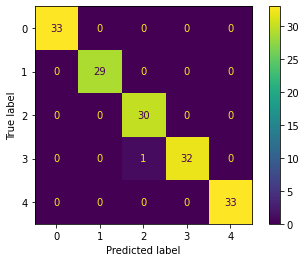

In [288]:
plot_confusion_matrix(dt_best,X_test,y_test)